In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
def parse_simple_cpu(fpath):
    with open(fpath, 'r') as f:
        ctx = f.read()
    ctx = ctx.strip().split('\n')
    proc_time = float(ctx[2].split(':')[1][:-len('ms') - 1])
    res, err = map(float, ctx[3].split('+-'))
    return (proc_time, res, err)

In [3]:
val, tick = [], []
times = []
for i in range(6, 17):
    t, v, e = parse_simple_cpu(f'../results/simple_cpu_{2 ** i}')
    tick.append(i)
    val.append((v-e, v+e))
    times.append((t, 0.00018 * (2 ** i)))

0.00022864497234800774


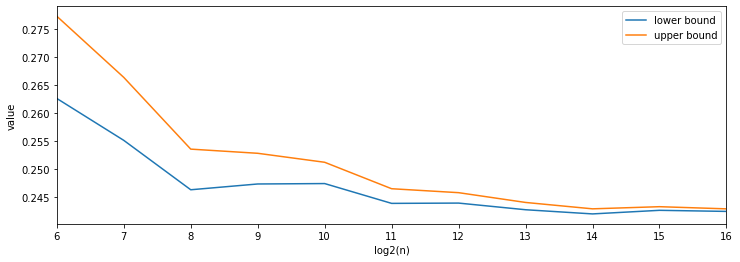

In [4]:
plt.figure(figsize=(12,4))
plt.xlim(min(tick), max(tick))
plt.xticks(tick)
plots = plt.plot(tick, val)
plt.legend(plots, ('lower bound', 'upper bound'), loc='best')
plt.xlabel('log2(n)')
plt.ylabel('value')
plt.savefig('simple_cpu_val.pdf')

print((val[-1][1] - val[-1][0]) / 2)

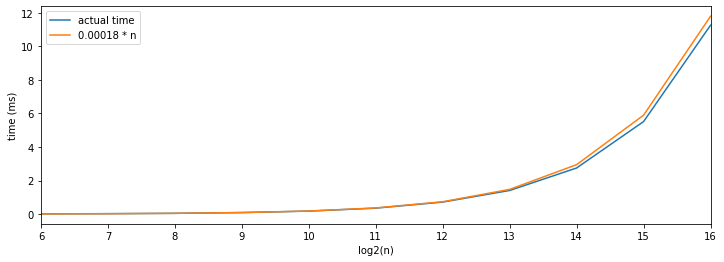

In [5]:
plt.figure(figsize=(12,4))
plt.xlim(min(tick), max(tick))
plt.xticks(tick)
plots = plt.plot(tick, times)
plt.legend(plots, ('actual time', '0.00018 * n'), loc='best')
plt.xlabel('log2(n)')
plt.ylabel('time (ms)')
plt.savefig('simple_cpu_time.pdf')

In [6]:
def parse_import_cpu(fpath):
    with open(fpath, 'r') as f:
        ctx = f.read()
    ctx = ctx.strip().split('\n')
    proc_time = float(ctx[2].split(':')[1][:-len('ms') - 1])
    res, err = map(float, ctx[3].split('+-'))
    return (proc_time, res, err)

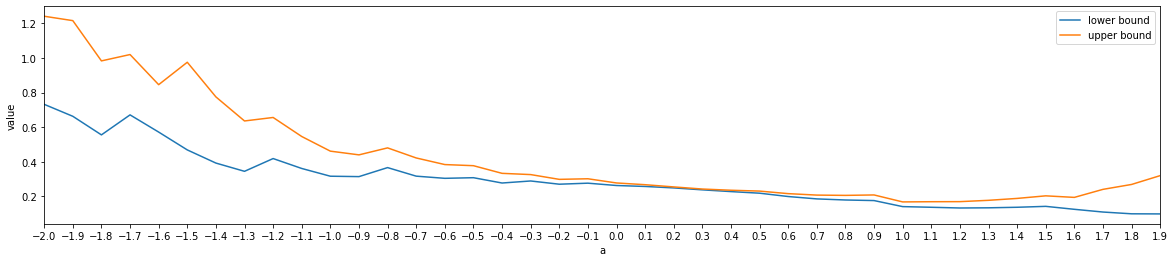

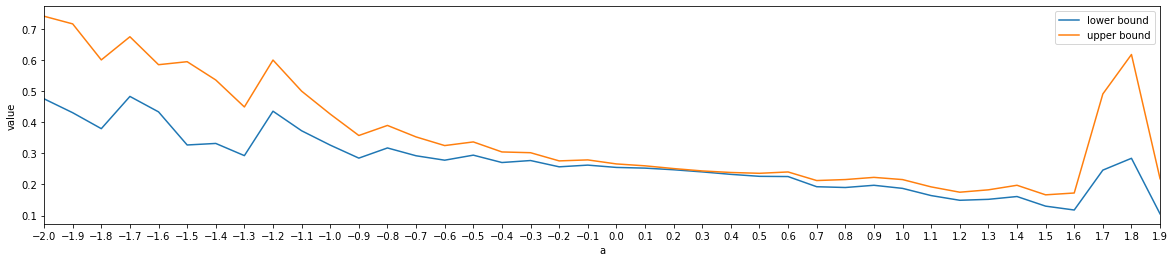

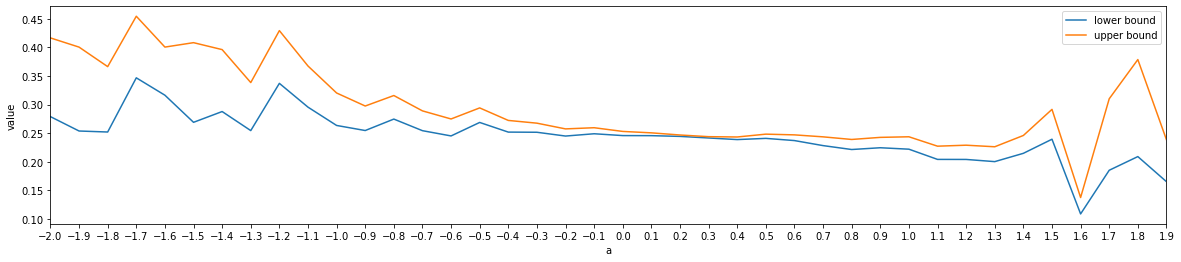

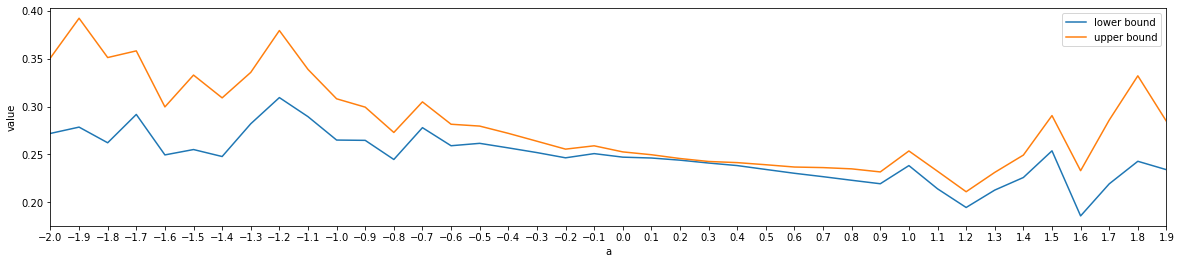

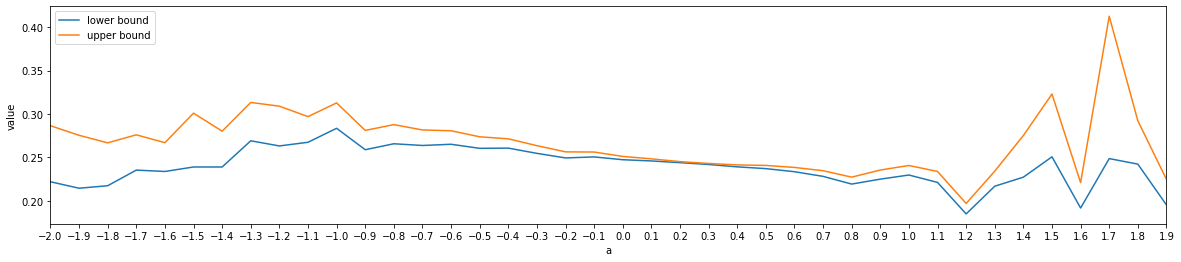

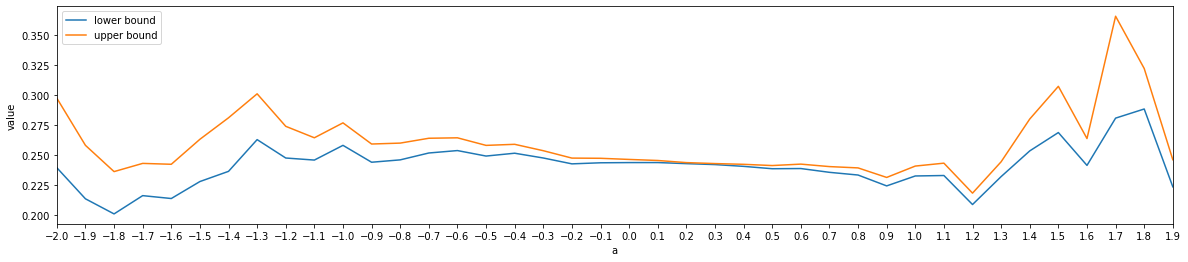

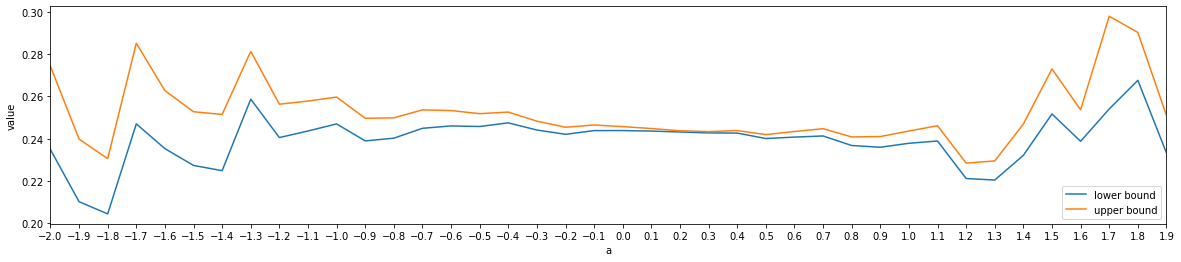

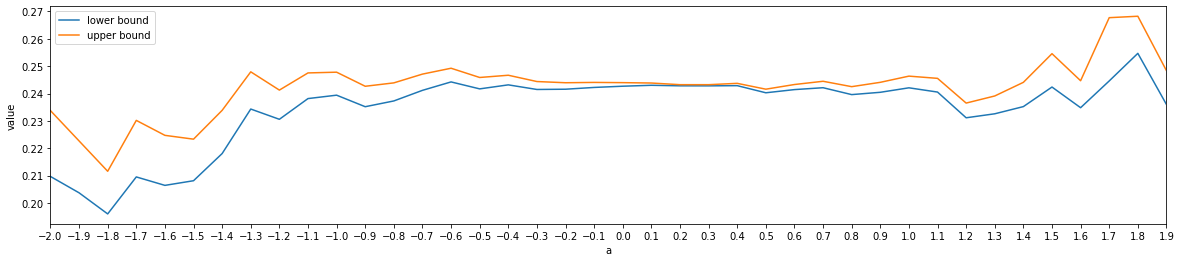

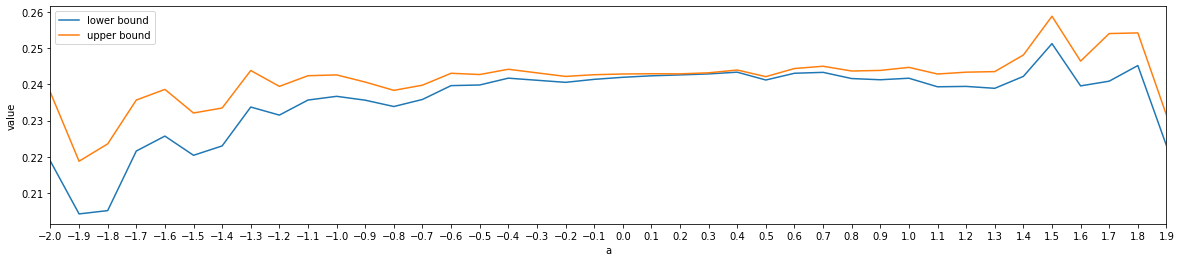

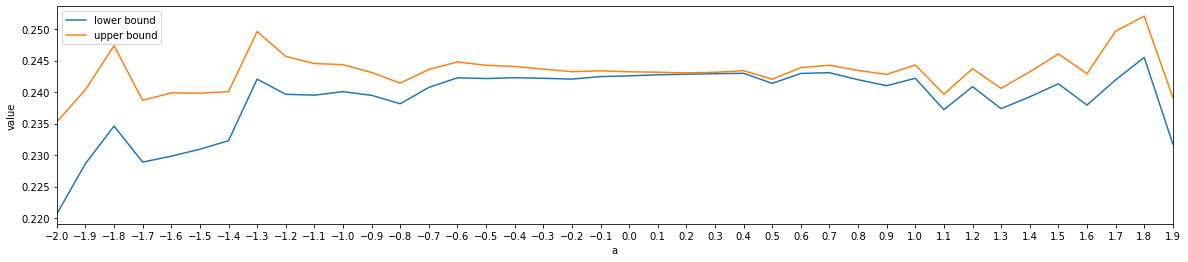

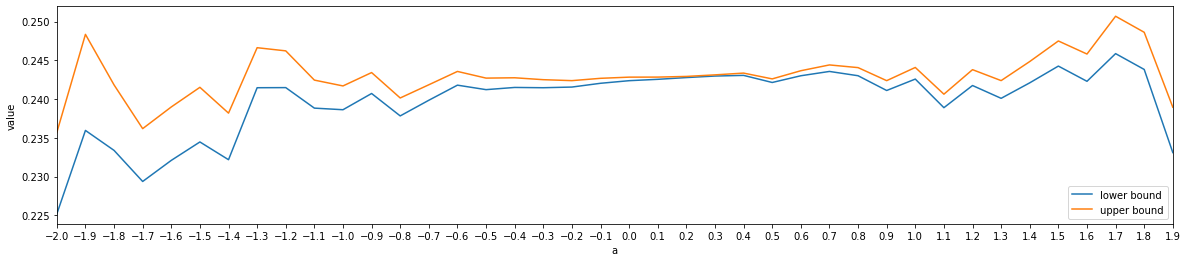

In [7]:
for bk in range(6, 17):
    val, tick = [], []
    for i in range(-20, 20):
        t, v, e = parse_import_cpu(f'../results/import_cpu_{2**bk}_{i/10 if i != 0 else 0}')
        tick.append(i / 10)
        val.append((v-e, v+e))
    plt.figure(figsize=(20,4))
    plt.xlim(min(tick), max(tick))
    plt.xticks(tick)
    plots = plt.plot(tick, val)
    plt.legend(plots, ('lower bound', 'upper bound'), loc='best')
    plt.xlabel('a')
    plt.ylabel('value')
    plt.savefig(f'import_cpu_{2**bk}.pdf')

In [8]:
best = (9487, 7122)

tick, times = [], []
for i in range(-30, 30):
    t, v, e = parse_import_cpu(f'../results/import_cpu_65536_{i/10 if i != 0 else 0}')
    tick.append(i / 10)
    times.append(t)

    best = min(best, (e, i / 10))
print(best)

(7.3662811317e-05, 0.2)


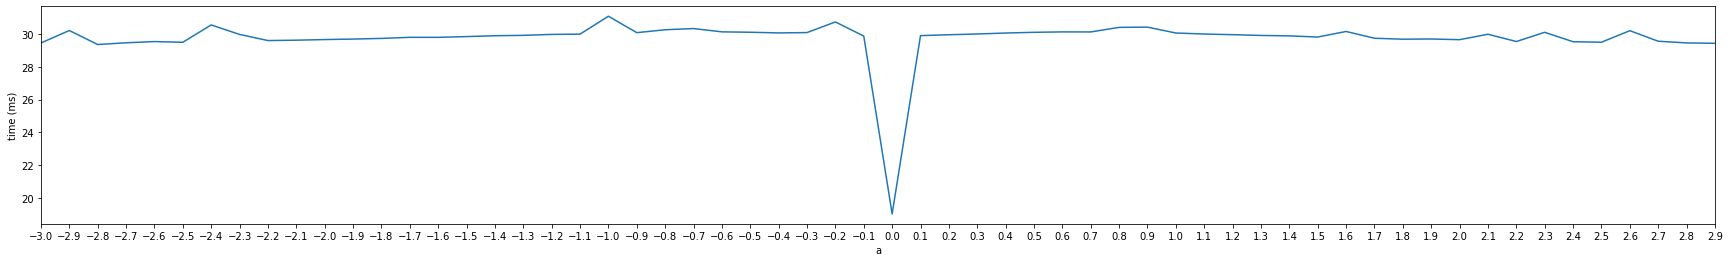

In [9]:
plt.figure(figsize=(30,4))
plt.xlim(min(tick), max(tick))
plt.xticks(tick)
plots = plt.plot(tick, times)
plt.xlabel('a')
plt.ylabel('time (ms)')
plt.show()

In [10]:
def parse_simple_gpu(fpath):
    with open(fpath, 'r') as f:
        ctx = f.read()
    ctx = ctx.strip().split('\n')
    inp_time = float(ctx[5].split(':')[1][:-len('(ms)') - 1])
    proc_time = float(ctx[6].split(':')[1][:-len('(ms)') - 1])
    cpu_time = float(ctx[7].split(':')[1][:-len('(ms)') - 1])
    res, err = map(float, ctx[8].split('+-'))
    return (inp_time, proc_time, cpu_time, res, err)

16 (0.311232, 256, 64) (0.000226585103697, 0.242645382880486)
11.263


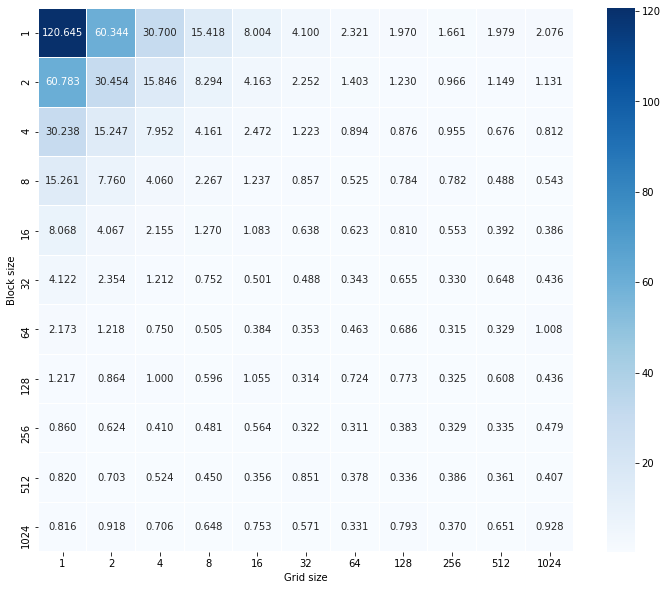

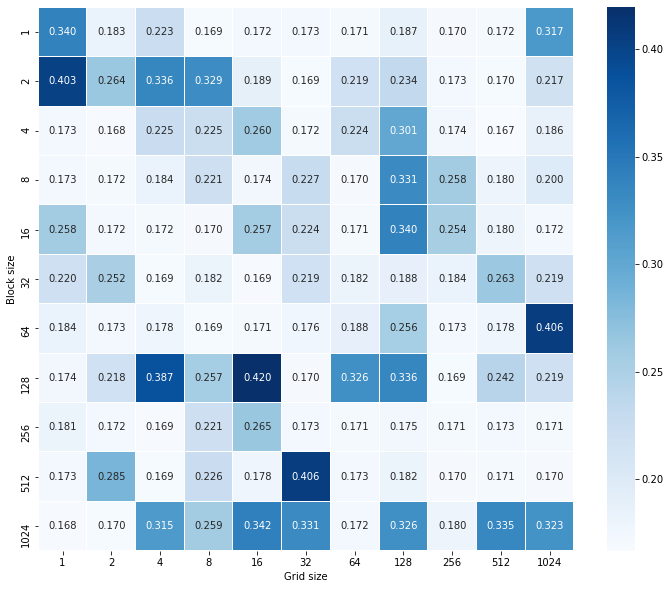

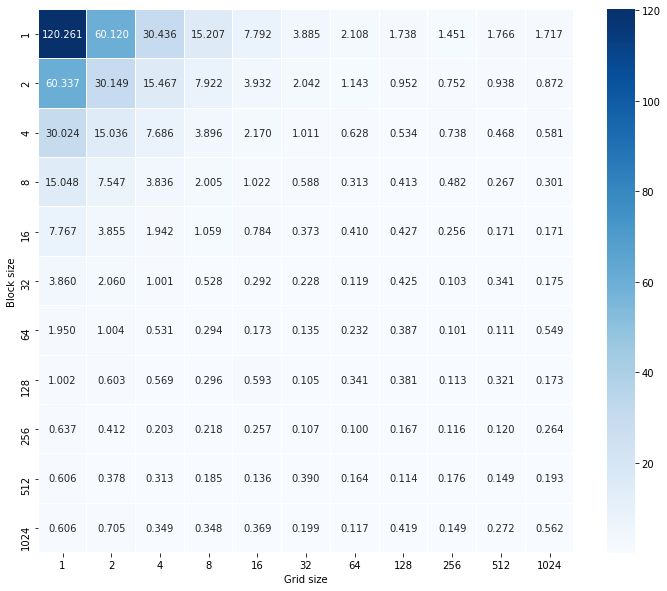

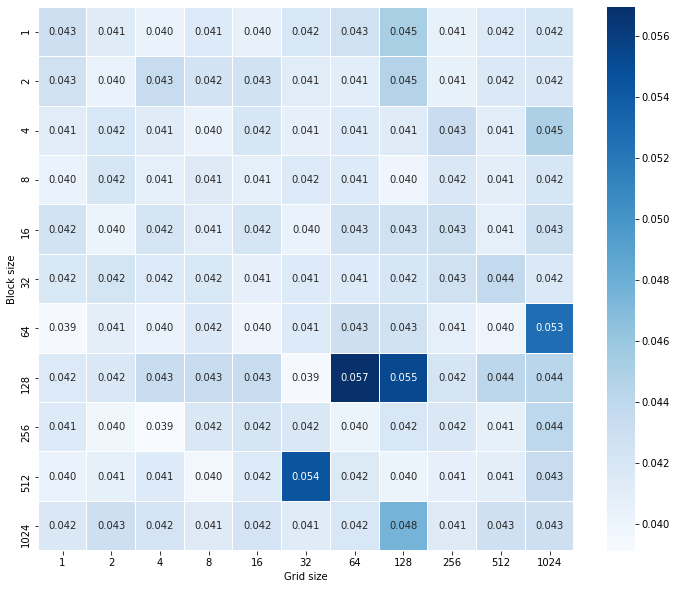

In [11]:
for i in range(16, 17):
    e = (7122, 9487)
    opt = (7122, 0, 0)
    block_sizes = []
    grid_sizes = []
    mat = [[] for _ in [0]*4]
    for j in range(11):
        mat[0].append([])
        mat[1].append([])
        mat[2].append([])
        mat[3].append([])
        block_sizes.append(2**j)
        grid_sizes.append(2**j)
        for k in range(11):
            it, pt, ct, res, err = parse_simple_gpu(f'../results/simple_gpu_{2**i}_{2**j}_{2**k}')
            mat[0][-1].append(it+pt+ct)
            mat[1][-1].append(it)
            mat[2][-1].append(pt)
            mat[3][-1].append(ct)
            opt = min(opt, (it+pt+ct, 2**j, 2**k))
            e = min(e, (err, res))
    for j in range(4):
        fig, ax = plt.subplots(figsize=(12,10))
        ax = sns.heatmap(mat[j], annot=True, cmap="Blues",
                        fmt=".3f", xticklabels=block_sizes,
                        yticklabels=grid_sizes, linewidths=.005)
        plt.xlabel('Grid size')
        plt.ylabel('Block size')
        plt.savefig(f'simple_gpu_65536_{j}.pdf')
    print(i, opt, e)
    print(parse_simple_cpu(f'../results/simple_cpu_{2**i}')[0])

In [12]:
def parse_import_gpu(fpath):
    with open(fpath, 'r') as f:
        ctx = f.read()
    ctx = ctx.strip().split('\n')
    inp_time = float(ctx[5].split(':')[1][:-len('(ms)') - 1])
    proc_time = float(ctx[6].split(':')[1][:-len('(ms)') - 1])
    cpu_time = float(ctx[7].split(':')[1][:-len('(ms)') - 1])
    res, err = map(float, ctx[8].split('+-'))
    return (inp_time, proc_time, cpu_time, res, err)

16 (0.35177600000000003, 1024, 32) (0.000226030396642, 0.237758851381928)
(29.943, 0.242857073980317, 7.3662811317e-05)


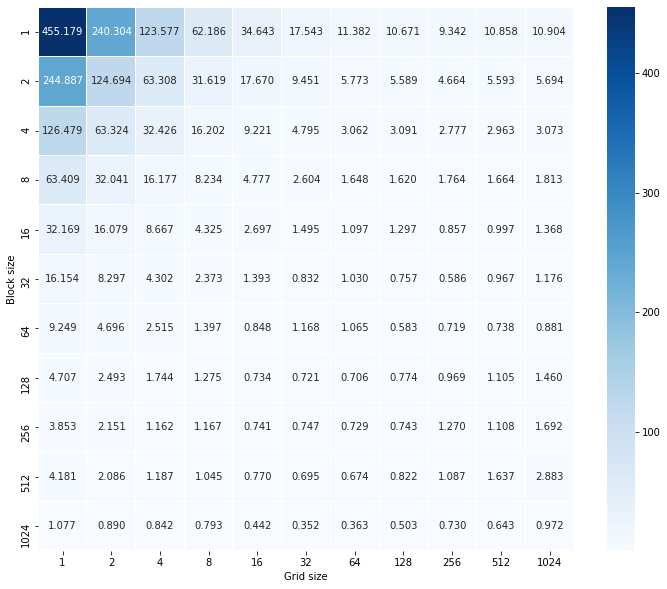

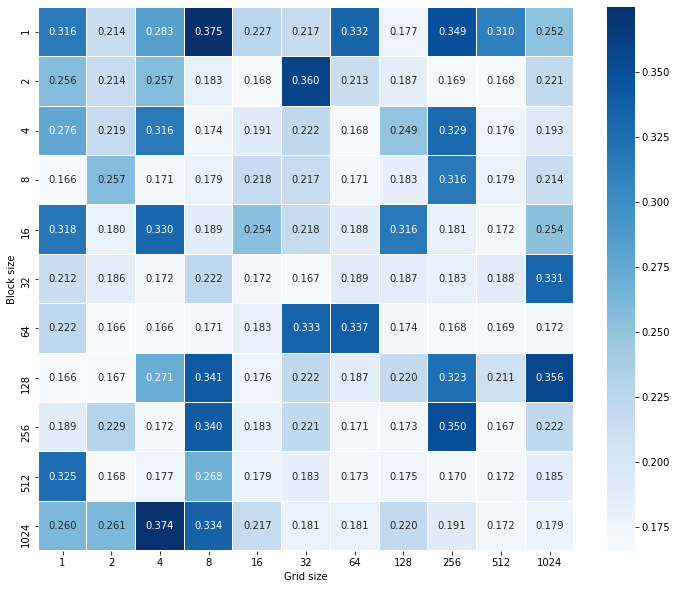

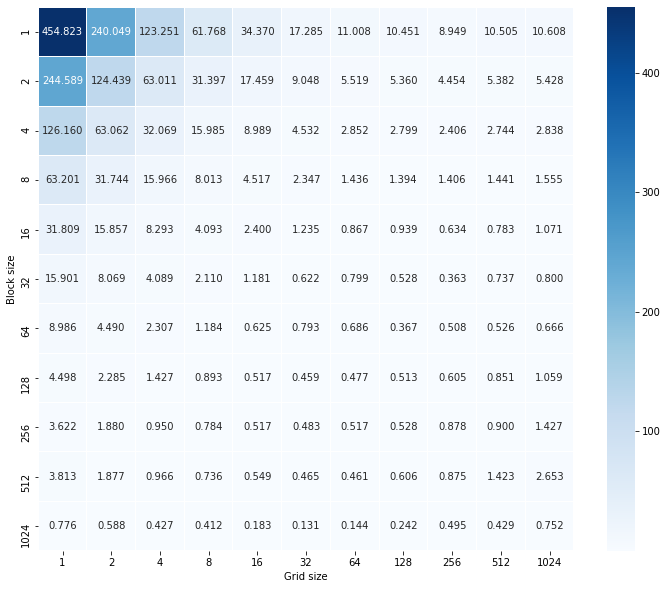

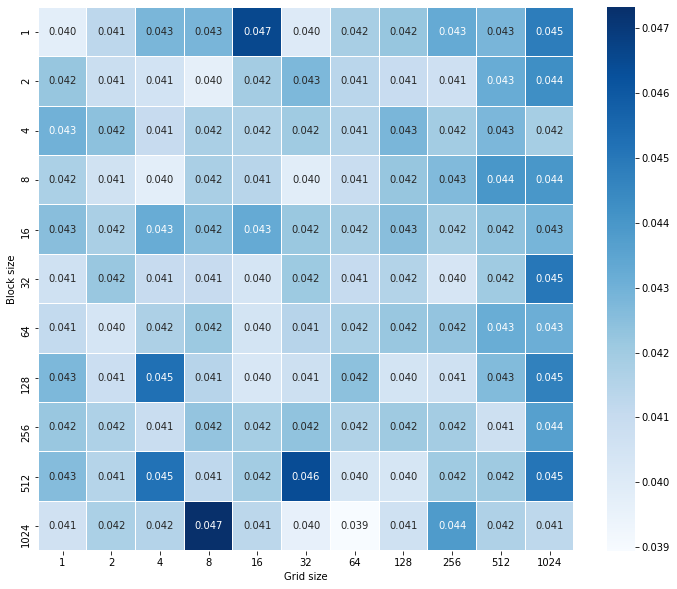

In [13]:
for i in range(16, 17):
    e = (7122, 9487)
    opt = (7122, 0, 0)
    block_sizes = []
    grid_sizes = []
    mat = [[] for _ in [0]*4]
    for j in range(11):
        mat[0].append([])
        mat[1].append([])
        mat[2].append([])
        mat[3].append([])
        block_sizes.append(2**j)
        grid_sizes.append(2**j)
        for k in range(11):
            it, pt, ct, res, err = parse_simple_gpu(f'../results/import_gpu_{2**i}_{2**j}_{2**k}_0.2')
            mat[0][-1].append(it+pt+ct)
            mat[1][-1].append(it)
            mat[2][-1].append(pt)
            mat[3][-1].append(ct)
            opt = min(opt, (it+pt+ct, 2**j, 2**k))
            e = min(e, (err, res))
    for j in range(4):
        fig, ax = plt.subplots(figsize=(12,10))
        ax = sns.heatmap(mat[j], annot=True, cmap="Blues",
                        fmt=".3f", xticklabels=block_sizes,
                        yticklabels=grid_sizes, linewidths=.005)
        plt.xlabel('Grid size')
        plt.ylabel('Block size')
        plt.savefig(f'import_gpu_65536_{j}.pdf')
    print(i, opt, e)
    print(parse_simple_cpu(f'../results/import_cpu_{2**i}_0.2'))